# make sure what python normal distribution does

what does numpy.random.normal do?

According to [the documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) we have:

$$f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

it draws random samples according to the normal distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

First we crate a sample distribution

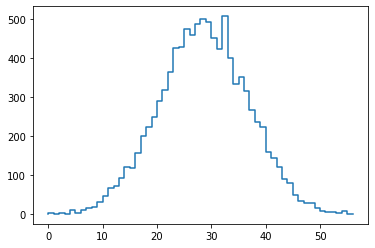

In [2]:
mean_sim = 10
sigma_sim = 4
data = np.random.normal(loc = mean_sim, scale = sigma_sim, size=10000)
hist = np.histogram(data, bins="auto")[0]
x = np.arange(0, len(hist), 1)

plt.step(x, hist)

now we define an exponential fit function

In [3]:
def fit_function(x, *p):
    # gauss
    return p[0] * np.exp(-(x - p[1]) ** 2 / (2. * p[2] ** 2))

# fit params and some initial values
y = hist
x = x
p = [1, 1, 1]

# do fit
popt, pcov = curve_fit(fit_function, x, y, p0=p)

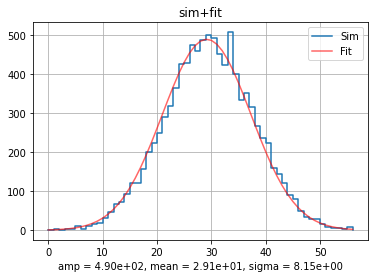

In [4]:
# plot fit and data

fig = plt.figure()
ax = fig.gca()
ax.step(x, y, label='Sim', where='post')
ax.plot(x, fit_function(x, *popt), 'r', label='Fit', alpha=0.6)
ax.set_xlabel('amp = {:0.2e}, mean = {:0.2e}, sigma = {:0.2e}'.format(popt[0], popt[1], popt[2]))
ax.set_title('sim+fit')
legend = ax.legend(loc='upper right', shadow=False)
ax.grid()

In [5]:
print(f'amp is {popt[0]:0.2e}, mean = {popt[1]:0.2e} and sigma is {popt[2]:0.2e}')

amp is 4.90e+02, mean = 2.91e+01 and sigma is 8.15e+00


In [6]:
np.sum(y)

10000

In [7]:
np.sum(fit_function(x, *popt))

10003.404730432352